## Omkar Thawakar
#### Single Continious Perceptron (with and without momentum)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.colors import ListedColormap

### Without momentum

In [76]:
class Neuron:
    def __init__(self,eta=0.01):
        self.eta=eta
        
    def init_weights(self,X):
        #self.w_ = np.random.uniform(-1,1,1+X.shape[1])
        self.w_ = np.array([ 0.26549065,  0.90864179,  0.44052682])
        return self.w_
    
    def train(self,X,outputs,e_max):
        self.w_ = np.array([ 0.26549065,  0.90864179,  0.44052682])
        print('Initial Weights : ',self.w_)
        self.error_ = []
        epoch=1
        steps = 0
        done = False
        start_time = time.time()
        while not done:
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x)
                err += 0.5*(d-out)**2
                self.w_[1:] = self.w_[1:] + self.eta*(d-out)*self.gradient(x)*x
                self.w_[0] = self.w_[0] + self.eta*(d-out)*self.gradient(x)*1
                steps+=1
            if err<e_max:
                done = True
                stop_time = time.time()
                print("Training done")
            else:
                epoch+=1
                self.error_.append(err)
        print("No of steps required for training are : ",steps)
        print("Final Error : ",self.error_[-1])
        print('Time required for training is {} seconds '.format(stop_time-start_time))
        return self
    
    def get_weights(self):
        return self.w_

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]

    def activation(self,X):
        net = self.net_input(X)
        return (1-np.exp(-net))/(1+np.exp(-net))
    
    def gradient(self,X):
        return 0.5*(1-self.predict(X)**2)

    def predict(self,X):
        return self.activation(X)

In [77]:
#OR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([-1,1,1,1])

In [78]:
neuron = Neuron() 

In [79]:
neuron.init_weights(X)

array([ 0.26549065,  0.90864179,  0.44052682])

In [80]:
neuron.train(X,d,0.001)

Initial Weights :  [ 0.26549065  0.90864179  0.44052682]
Training done
No of steps required for training are :  952308
Final Error :  0.00100000069568
Time required for raining is :  35.83128786087036


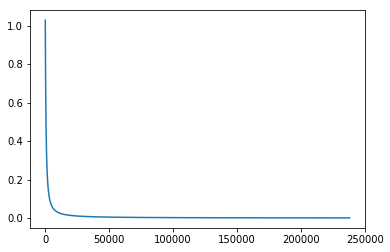

In [81]:
plt.plot(neuron.error_)
plt.show()

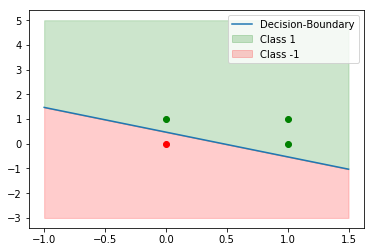

In [82]:
x = np.arange(-1,2,0.5)
a,b,c = neuron.w_[1],neuron.w_[2],neuron.w_[0]
y = (-1*c-1*a*x)/b 
colors = ['blue','green','red']
plt.plot(x,y,label='Decision-Boundary')
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='green' if j==1 else 'red')
plt.fill_between(x,y,5,color='green',alpha=0.2,label='Class 1')
plt.fill_between(x,y,-3,color='red',alpha=0.2,label='Class -1')
plt.legend()
plt.show()

In [83]:
neuron.predict(np.array([0,0]))

-0.96661313344593025

# With Momentum

In [94]:
class Neuron_With_Momentum:
    def __init__(self,eta=0.01,alpha=0.8):
        self.eta=eta
        self.alpha=alpha
        
    def init_weights(self,X):
        #self.w_ = np.random.uniform(-1,1,1+X.shape[1])
        self.w_ = np.array([ 0.26549065,  0.90864179,  0.44052682])
        return self.w_
    
    def train(self,X,outputs,e_max):
        self.w_ = np.array([ 0.26549065,  0.90864179,  0.44052682])
        print('Initial Weights : ',self.w_)
        self.error_ = []
        epoch=1
        steps = 0
        done = False
        start_time = time.time()
        delta_w_0 , delta_w = 0,0 # initial momemtum term
        while not done:
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x)
                err += 0.5*(d-out)**2
                self.w_[1:] = self.w_[1:] + self.eta*(d-out)*self.gradient(x)*x + self.alpha*delta_w #adding momentum
                self.w_[0] = self.w_[0] + self.eta*(d-out)*self.gradient(x)*1 + self.alpha*delta_w_0 #adding momentum
                delta_w_0 , delta_w = self.eta*(d-out)*self.gradient(x)*1,self.eta*(d-out)*self.gradient(x)*x
                steps+=1
            if err<e_max:
                done = True
                stop_time = time.time()
                print("Training done")
            else:
                epoch+=1
                self.error_.append(err)
        print("No of steps required for training are : ",steps)
        print("Final Error : ",self.error_[-1])
        print('Time required for raining is {} seconds : '.format(stop_time-start_time))
        return self
    
    def get_weights(self):
        return self.w_

    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]

    def activation(self,X):
        net = self.net_input(X)
        return (1-np.exp(-net))/(1+np.exp(-net))
    
    def gradient(self,X):
        return 0.5*(1-self.predict(X)**2)

    def predict(self,X):
        return self.activation(X)

In [95]:
neuron2 = Neuron_With_Momentum() 

In [96]:
#OR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([-1,1,1,1])

In [97]:
neuron2.init_weights(X)

array([ 0.26549065,  0.90864179,  0.44052682])

In [98]:
neuron2.train(X,d,0.001)

Initial Weights :  [ 0.26549065  0.90864179  0.44052682]
Training done
No of steps required for training are :  529060
Final Error :  0.00100000400986
Time required for raining is 34.2339026927948 seconds : 


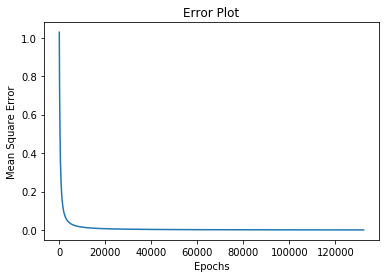

In [103]:
plt.plot(neuron2.error_)
plt.title('Error Plot')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.show()

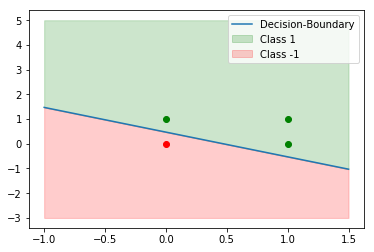

In [100]:
x = np.arange(-1,2,0.5)
a,b,c = neuron2.w_[1],neuron2.w_[2],neuron2.w_[0]
y = (-1*c-1*a*x)/b 
colors = ['blue','green','red']
plt.plot(x,y,label='Decision-Boundary')
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='green' if j==1 else 'red')
plt.fill_between(x,y,5,color='green',alpha=0.2,label='Class 1')
plt.fill_between(x,y,-3,color='red',alpha=0.2,label='Class -1')
plt.legend()
plt.show()

In [101]:
neuron2.predict(np.array([0,0]))

-0.96661315707474305